In [ ]:
import pandas as pd

### import dataset

In [ ]:
df = pd.read_csv('phishing_email.csv')

In [ ]:
df.head()

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82486 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text_combined  82486 non-null  object
 1   label          82486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

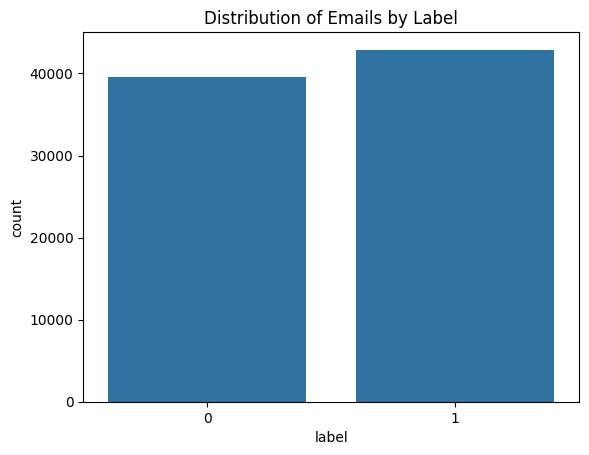

In [ ]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Emails by Label')
plt.show()

### data splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['text_combined'], df['label'], test_size = 0.2, random_state = 42)

In [ ]:
print(f"Jumlah x train: {len(x_train)}")
print(f"Jumlah x test: {len(x_test)}")
print(f"Jumlah y train: {len(y_train)}")
print(f"Jumlah y test: {len(y_test)}")

Jumlah x train: 65988
Jumlah x test: 16498
Jumlah y train: 65988
Jumlah y test: 16498


### vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

## machine learning

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)

y_lr_pred = lr.predict(x_test_tfidf)

lr_accuracy = accuracy_score(y_test, y_lr_pred)
print(f"Akurasi Logistic Regression: {lr_accuracy}")

lr_classification_report = classification_report(y_test, y_lr_pred)
print("Laporan Klasifikasi Logistic Regression:")
print(lr_classification_report)

lr_confusion_matrix = confusion_matrix(y_test, y_lr_pred)
print("Confusion Matrix Logistic Regression:")
print(lr_confusion_matrix)

Akurasi Logistic Regression: 0.9845435810401261
Laporan Klasifikasi Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7935
           1       0.98      0.99      0.99      8563

    accuracy                           0.98     16498
   macro avg       0.98      0.98      0.98     16498
weighted avg       0.98      0.98      0.98     16498

Confusion Matrix Logistic Regression:
[[7768  167]
 [  88 8475]]


### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train_tfidf, y_train)
y_rf_pred = rf.predict(x_test_tfidf)

rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f"Akurasi Random Forest: {rf_accuracy}")

rf_classification_report = classification_report(y_test, y_rf_pred)
print("Laporan Klasifikasi Random Forest:")
print(rf_classification_report)

rf_confusion_matrix = confusion_matrix(y_test, y_rf_pred)
print("Confusion Matrix Random Forest:")
print(rf_confusion_matrix)

Akurasi Random Forest: 0.9830282458479815
Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7935
           1       0.99      0.98      0.98      8563

    accuracy                           0.98     16498
   macro avg       0.98      0.98      0.98     16498
weighted avg       0.98      0.98      0.98     16498

Confusion Matrix Random Forest:
[[7838   97]
 [ 183 8380]]


### xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train_tfidf, y_train)
y_xgb_pred = xgb_model.predict(x_test_tfidf)

xgb_accuracy = accuracy_score(y_test, y_xgb_pred)
print(f"Akurasi XGBoost: {xgb_accuracy}")

xgb_classification_report = classification_report(y_test, y_xgb_pred)
print("Laporan Klasifikasi XGBoost:")
print(xgb_classification_report)

xgb_confusion_matrix = confusion_matrix(y_test, y_xgb_pred)
print("Confusion Matrix XGBoost:")
print(xgb_confusion_matrix)

Akurasi XGBoost: 0.9799369620560068
Laporan Klasifikasi XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7935
           1       0.97      0.99      0.98      8563

    accuracy                           0.98     16498
   macro avg       0.98      0.98      0.98     16498
weighted avg       0.98      0.98      0.98     16498

Confusion Matrix XGBoost:
[[7688  247]
 [  84 8479]]


### naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()
nb.fit(x_train_tfidf,y_train)
y_nb_pred = nb.predict(x_test_tfidf)

nb_accuracy = accuracy_score(y_test, y_nb_pred)
print(f"Akurasi Naive Bayes: {nb_accuracy}")

nb_classification_report = classification_report(y_test, y_nb_pred)
print("Laporan Klasifikasi Naive Bayes:")
print(nb_classification_report)

nb_confusion_matrix = confusion_matrix(y_test, y_nb_pred)
print("Confusion Matrix Naive Bayes:")
print(nb_confusion_matrix)

Akurasi Naive Bayes: 0.9778154927870045
Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7935
           1       0.99      0.97      0.98      8563

    accuracy                           0.98     16498
   macro avg       0.98      0.98      0.98     16498
weighted avg       0.98      0.98      0.98     16498

Confusion Matrix Naive Bayes:
[[7856   79]
 [ 287 8276]]
